In [1]:
import numpy as np
import matplotlib.pyplot as plt

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [10]:
def sigmoid(z_data):
  return 1 / (1 + np.exp(-np.array(z_data)))

In [8]:
z = [-2, -1, 0, 1, 2]

In [12]:
result_sigmoid = sigmoid(z)

In [14]:
result_sigmoid

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

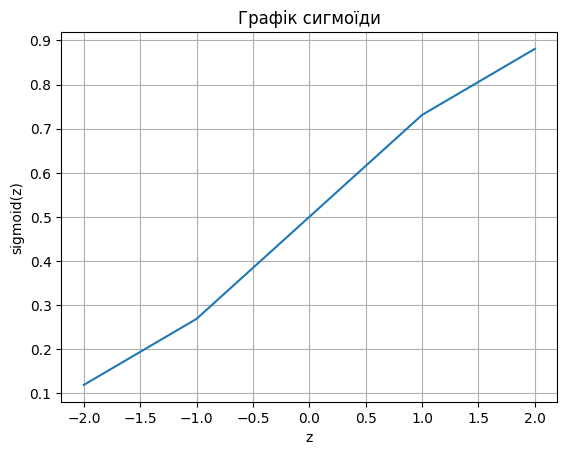

In [13]:
plt.plot(z, result_sigmoid)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Графік сигмоїди')
plt.grid(True)
plt.show()



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


θ — це вектор параметрів моделі

x — це вектор вхідних ознак (фічі для передбачення)

Нам треба скалярний добуток цих двох векторів.

In [16]:
def hypothesis(theta, X):
  #
  # Якщо theta має форму (m, 1) (вектор-стовпець) → .flatten() зробить його (m,)
  # Якщо theta вже має форму (m,) → .flatten() нічого не змінить
  # Якщо theta має форму (1, m) (вектор-рядок) → .flatten() теж зробить його (m,)
  #
  theta = theta.flatten()
  return sigmoid(np.dot(X, theta))

In [17]:
my_theta = np.array([0.5, -0.5])
my_X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])

In [18]:
my_theta

array([ 0.5, -0.5])

In [19]:
my_X

array([[ 1,  2],
       [ 1, -1],
       [ 1,  0],
       [ 1,  1]])

In [20]:
result_hypothesis = hypothesis(my_theta, my_X)

In [21]:
result_hypothesis

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [28]:
def compute_gradient(theta, X, y):
  # m - кількість навчальних прикладів
  # h_theta від x - це гіпотеза моделі (логістична функція)
  m = len(y)
  theta = theta.flatten()
  h = hypothesis(theta, X)
  gradient = (1 / m) * np.dot((h - y), X)
  return gradient

In [30]:
new_theta = np.array([0.5, -0.5])
new_X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])
new_y = np.array([1, 0, 1, 0])

In [31]:
gradient_log_reg = compute_gradient(new_theta, new_X, new_y)

In [32]:
gradient_log_reg

array([ 0.05776464, -0.36899431])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [35]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0 # початкові довільні параметри
    n = len(y)
    errors = []
    for i in range(epochs):
        y_pred = hypothesis(np.array([m, b]), X)
        error = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        errors.append(error)
        gradient_m = (1 / n) * np.sum((y_pred - y) * X[:, 0])
        gradient_b = (1 / n) * np.sum((y_pred - y) * X[:, 1])
        m = m - lr * gradient_m
        b = b - lr * gradient_b
    return m, b, errors

In [33]:
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0])

In [37]:
result_m, result_b, result_errors = full_batch_gradient_descent(X, y)

In [38]:
result_m, result_b

(-0.2893693041626857, 0.7765512544925172)

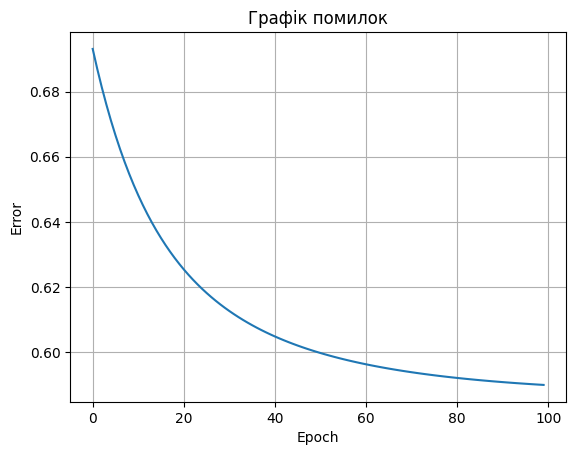

In [39]:
plt.plot(result_errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Графік помилок')
plt.grid(True)
plt.show()

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [41]:
def predict_proba(theta, X):
    return hypothesis(theta, X)

In [42]:
def predict(theta, X, threshold=0.5):
    probabilities = predict_proba(theta, X)
    return (probabilities >= threshold).astype(int)

In [51]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [45]:
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0])
theta = np.array([result_m, result_b])

In [48]:
probabilities = predict_proba(theta, X)
print(f'Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1: \n{probabilities}')

Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1: 
[0.77966809 0.25617965 0.42815828 0.61944235]


In [49]:
predicted_classes = predict(theta, X)
print(f'Передбачені класи кожного екземпляра з матриці X: \n{predicted_classes}')

Передбачені класи кожного екземпляра з матриці X: 
[1 0 0 1]


In [52]:
accuracy_score = accuracy(y, predicted_classes)
print("Точність моделі:", accuracy_score)

Точність моделі: 0.5
